In [21]:
import numpy as np
from matplotlib import pyplot as plt
import os
import skimage
from skimage import io
from tqdm import tqdm
import glob
import cv2
import csv 
#入力する画像ファイルのディレクトリ、結果出力先のディレクトリを指定
#rootフォルダ （プログラム内容が記載させているフォルダ）- 「data」フォルダ - 「image」フォルダ内にある画像を処理し、「date」フォルダ-「result」フォルダに出力
path="date/"
input_dir="image"
output_dir="result" 

all_files=glob.glob(os.path.join(path,input_dir,"**/*.*"),recursive=True)#ファイルパスを結合してフルパスを作成
 
#追記型でcsvファイルを作成
csvfile = open("np_csv_test.csv", "w")
 

for i,filepath in tqdm(enumerate(all_files)):#画像処理ループ
 
    
    src = cv2.imread(filepath)#画像の読み込み
    src=cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
 
    
    src = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)#座標の読み込みが左上からであるため、画像の左下が原点になるように補正
    dst = cv2.inRange(src, (230, 230, 230), (255, 255, 255))#RGBの順番 lower,upper色素の範囲を選択
 
    #スクリプトファイルと同階層に保存されます。
    #finenameから「画像ファイル名.bmp」を抽出する
    filename = filepath.rsplit("\\")[1]
    #出力する画像ファイルのフルパスを作成する
    outputimage = path + output_dir +"/" + "Extracted_redline_" + filename
    cv2.imwrite(outputimage, dst)
 
   
    indices = np.dstack(np.where(dst == 255)) #Y,Xの順で出力される。二次元配列を形成特定の色の座標を取得
    #画像1枚に対して、csv1個が生成する。
    outputcsv = path + output_dir +"/" + "result.csv";
 
    
    #実行のたびに、csvファイルに上書きされる。新たに追加で値が記載されている。
    x = indices[0,:]# indicesの配列を与える。
    with open(outputcsv, 'ab') as f:
        np.savetxt(f, x, fmt="%.0d", delimiter = ",")#csvに書き込み
 
#csvファイルのクローズ
csvfile.close()

1it [00:00, 111.40it/s]


In [ ]:
import numpy as np #csv読み込み
import matplotlib.pyplot as plt #csvのデータを散布図を描画
date_set=np.loadtxt(
    fname='date/result/result.csv',dtype='float' ,delimiter=',')
for date in date_set:
    plt.scatter(date[0],date[1],color='white',zorder=2#優先度を決定
    )#列の1列目と2列目を読み込んでいる（csvのデータによって変換する）
plt.title('分子の位置',fontname ='MS Gothic')#タイトル
plt.xlabel('x座標',fontname ='MS Gothic')#文字化けをなくすためfontnameで指定
plt.ylabel('y座標',fontname ='MS Gothic')
plt.xlim(0,512)#グラフの範囲を指定
plt.ylim(0,512)
plt.grid(linewidth='1',zorder=1)#ぐりっと線

plt.show('')

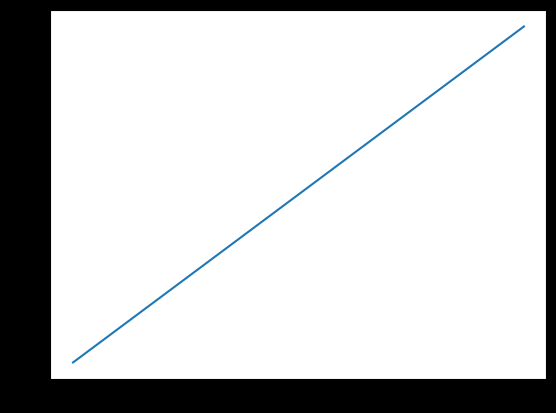

In [28]:
import matplotlib.pyplot as pl
plt.plot([0,1,2])
plt.show()